In [38]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [39]:
data = pd.read_csv(r"C:/Users/madha/Documents/BE Project/Dataset.csv").astype('float32')

In [40]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,209.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,122.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']

In [43]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.14285)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [44]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (117386, 28, 28)
Test data shape:  (19564, 28, 28)


In [45]:
# Dictionary for getting characters from index values...
sym_dict =  {0:'0',
                    1:'1',
                     2:'2',
                     3:'3',
                     4:'4',
                     5:'5',
                     6:'6',
                     7:'7',
                     8:'8',
                     9:'9',
                     10:'+',
                     11:'-',
                     12:'x',
                     13:'÷',
                     14:'(',
                     15:')',
                     16:'[',
                     17:']',
                     18:'{',
                     19:'}',
                     20:'a',
                     21:'b',
                     22:'c',
                     23:'d', 
                     24:'e',
                     25:'f',
                     26:'g',
                     27:'h',
                     28:'i',
                     29:'j',
                     30:'k',
                     31:'l',
                     32:'m',
                     33:'n',
                     34:'o',
                     35:'p',
                     36:'q',
                     37:'r',
                     38:'s',
                     39:'t',
                     40:'u',
                     41:'v',
                     42:'w',
                     43:'x', 
                     44:'y',
                     45:'z',
                     46:'A',
                     47:'B',
                     48:'C', 
                     49:'D',
                     50:'E',
                     51:'F',
                     52:'G',
                     53:'H',
                     54:'I',
                     55:'J',
                     56:'K',
                     57:'L',
                     58:'M',
                     59:'N',
                     60:'O',
                     61:'P',
                     62:'Q',
                     63:'R',
                     64:'S',
                     65:'T',
                     66:'U',
                     67:'V',
                     68:'W',
                     69:'X',
                     70:'Y',
                     71:'Z',
                     72:'=',
                     73:'≠', 
                     74:'>',
                     75:'<',
                     76:'≥',
                     77:'≤',
                     78:'&',
                     79:'`',
                     80:':',
                     81:',',
                     82:'.',
                     83:'$',
                     84:'!',
                     85:'∃',
                     86:'@',
                     87:'∀',
                     88:'#',
                     89:'in',
                     90:'∞',
                     91:'∫',
                     92:'lim',
                     93:'log', 
                     94:'%',
                     95:'±',
                     96:'π',
                     97:'′',
                     98:'?',
                     99:'""',
                     100:'^',
                     101:'→',
                     102:'/',
                     103:'√',
                     104:'*',
                     105:'∑',
                     106:'~',
                     107:'_',
                     108:'sin',
                     109:'cos',
                     110:'tan',
                     111:'𝛂',
                     112:'β',
                     113:'𝛾', 
                     114:'δ',
                     115:'ε',
                     116:'ζ',
                     117:'𝜂',
                     118:'θ',
                     119:'λ', 
                     120:'μ',
                     121:'𝜈',
                     122:'π',
                     123:'ρ',
                     124:'σ',
                     125:'𝛕',
                     126:'Φ',
                     127:'ψ',
                     128:'ω',
                     129:'Ꭓ',
                     130:'ɩ',
                     131:'Κ',
                     132:'Ο',
                     133:'Ʊ',
                     134:'ξ'
            }

ValueError: shape mismatch: objects cannot be broadcast to a single shape

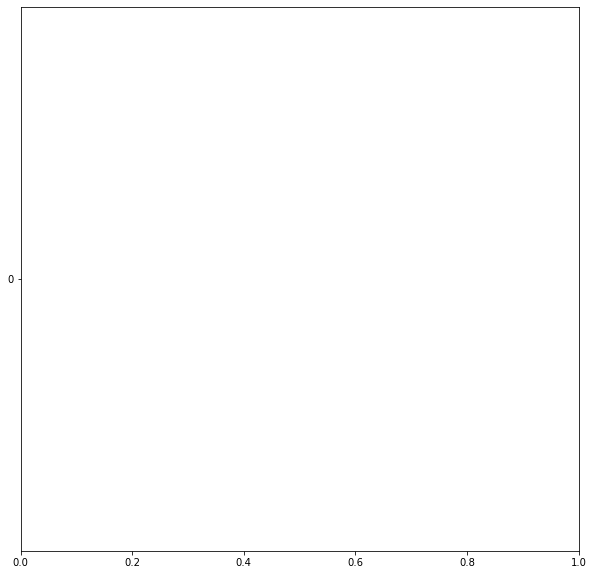

In [46]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(117386, dtype='int')
for i in train_yint:
    count[i] +=1

chrt = []
for i in sym_dict.values():
    chrt.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(chrt, count)

plt.xlabel("Number of elements ")
plt.ylabel("Characters")
plt.grid()
plt.show()


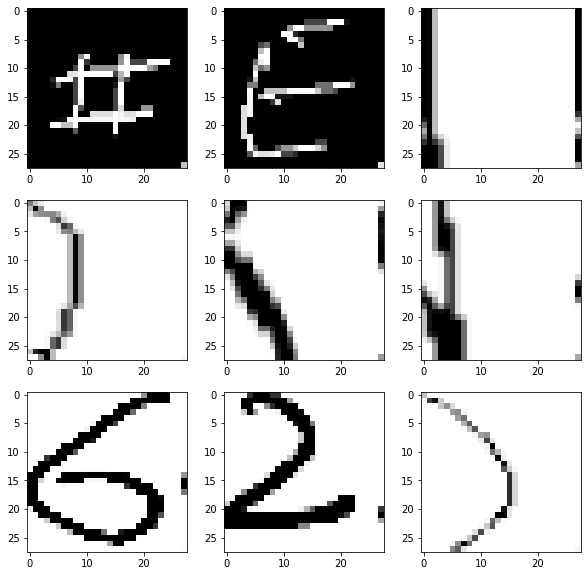

In [47]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [48]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


#Now we reshape the train & test image dataset so that they can be put in the model.


New shape of train data:  (117386, 28, 28, 1)
New shape of train data:  (19564, 28, 28, 1)


In [51]:
train_yOHE = to_categorical(train_y, num_classes = 136, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 136, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

IndexError: index 255 is out of bounds for axis 1 with size 136

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

In [ ]:
model.summary()
model.save(r'model_hand.h5')

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
img = cv2.imread(r'C:\Users\abhij\Downloads\img_b.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()